In [ ]:
!pip install wandb
!pip install wandb --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 29.7 MB/s 
     |████████████████████████████████| 145 kB 52.6 MB/s 
     |████████████████████████████████| 181 kB 51.5 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=f57a512faea6a99cf1e2ed9fb0a11cd0525c2ba7b30a311efe432eb79f26ebcc
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wandb
wandb.login()
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt # plotting library
import numpy as np # this module is useful to work with numerical arrays
import pandas as pd 
import random 
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader,random_split
from torch import nn
import torch.nn.functional as F
import torch.optim as optim




from torch.nn.modules.conv import ConvTranspose2d
from torch.nn.modules.flatten import Unflatten
from os import truncate
from torch.nn.modules.activation import ReLU
from torch.nn.modules.container import Sequential

from __future__ import print_function


#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# # Set random seed for reproducibility
# manualSeed = 999
# #manualSeed = random.randint(1, 10000) # use if you want new results
# print("Random Seed: ", manualSeed)
# random.seed(manualSeed)
# torch.manual_seed(manualSeed)



wandb: Currently logged in as: matancoo. Use `wandb login --relogin` to force relogin


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor()])


#nets feature map constant used to train network with a constant asymmetry
# Gfm = 256
# Dfm = 64
# removed scheduler, ture label =1, else constant.

batch_size = 128
LATEN_DIM = 100
EPOCH = 25


trainset = datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2) 


In [ ]:
#TODO: go through netwrok with teacher (example)

#  self.conv_blocks = nn.Sequential(
#             nn.BatchNorm2d(128),
#             nn.Upsample(scale_factor=2),
#             nn.Conv2d(128, 128, 3, stride=1, padding=1),
#             nn.BatchNorm2d(128, 0.8),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Upsample(scale_factor=2),
#             nn.Conv2d(128, 64, 3, stride=1, padding=1),
#             nn.BatchNorm2d(64, 0.8),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Conv2d(64, opt.channels, 3, stride=1, padding=1),
#             nn.Tanh(),




#TODO: better understand lr
# enc_scheduler = StepLR(enc_optim, step_size=30, gamma=0.5)
# dec_scheduler = StepLR(dec_optim, step_size=30, gamma=0.5)






In [ ]:
# Network 1

# class Generator(nn.Module):
#   #may even add another don layuer
#     def __init__(self,latenSpace_dim):
#       super().__init__()



#       self.generator_lin = nn.Sequential(
#         nn.Linear(latenSpace_dim,128*5*5),
#         nn.ReLU(0.2))
#       self.unflat = nn.Unflatten(dim=1, unflattened_size=(128,5,5))

#       self.generator_cnn = nn.Sequential(
#         nn.Conv2d(128,256,5,stride = 1, padding =0))
#       self.generator_cnnT1 = nn.Sequential(

#         nn.ConvTranspose2d(256,Gfm * 2,4,stride=1, padding= 0, bias=False), 
#         nn.BatchNorm2d(num_features=Gfm * 2),#256
#         nn.LeakyReLU(0.2, inplace=True),

#         nn.ConvTranspose2d(Gfm * 2,Gfm * 2,4,stride=2, padding= 1, bias=False), 
#         nn.BatchNorm2d(num_features=Gfm * 2),
#         nn.LeakyReLU(0.2, inplace=True),

#         nn.ConvTranspose2d(Gfm * 2,Gfm ,4,stride=2, padding= 1,bias=False), 
#         nn.BatchNorm2d(num_features=Gfm ),
#         nn.LeakyReLU(0.2, inplace=True))
  
    
#       self.generator_cnnT2 = nn.Sequential(
      
#         nn.ConvTranspose2d(Gfm,Gfm,3,stride =2, padding =1 ,bias=False),
#         nn.BatchNorm2d(num_features = Gfm),
#         nn.LeakyReLU(0.2, inplace=True),
#         # state size 32 x 32. 

#         nn.ConvTranspose2d(Gfm, 1, 2, stride=1, padding=2,bias=False),
#         nn.Tanh()
#         ) 
      

#     def forward(self, x):
#       # print(x.shape)
#       x = self.generator_lin(x)  
#       x = torch.squeeze(x)
#       # print(x.shape)
#       x = self.unflat(x)

      
#       # x= x.view((batch_size,128,5,5))
#       # print(x.shape)
      
#       x = self.generator_cnn(x)
#       # print(x.shape)

#       x = self.generator_cnnT1(x)
#       # print(x.shape)
   
#       x = self.generator_cnnT2(x)
#       # print(x.shape)

#       return x



# class Descriminator(nn.Module):
#     def __init__(self):
#         super().__init__()
#         #state size 28 x 28 x 1
#         self.descriminator_cnn1 = nn.Sequential(
#           nn.Conv2d(1,Dfm*2,4,stride =2, padding = 1),
#           nn.BatchNorm2d(num_features=Dfm *2),
#           nn.LeakyReLU(0.2, inplace=True))
        
#         self.descriminator_cnn2 = nn.Sequential(
#           nn.Conv2d(Dfm *2,Dfm *2,4,stride =2, padding = 1),
#           nn.BatchNorm2d(num_features=Dfm *2),
#           nn.LeakyReLU(0.2, inplace=True))
        
#         self.descriminator_cnn3 = nn.Sequential(
#           nn.Conv2d(Dfm *2, Dfm *2, 4, stride=2, padding = 1),
#           nn.BatchNorm2d(num_features=Dfm *2),
#           nn.LeakyReLU(0.2, inplace=True),

#           nn.Conv2d(Dfm *2, Dfm, 4, stride=2, padding = 1),
#           nn.BatchNorm2d(num_features=Dfm),
#           nn.LeakyReLU(0.2, inplace=True),

#           nn.Conv2d(Dfm,1,3, stride =2, padding = 1),   
#           nn.Sigmoid()
#         )
         
    
#     def forward(self, x):
#         # print(x.shape)
#         x = self.descriminator_cnn1(x)
#         # print(x.shape)

#         x = self.descriminator_cnn2(x)
#         # print(x.shape)

#         x = self.descriminator_cnn3(x)
#         # print(x.shape)

#         return x


In [ ]:
#network 2

class Generator(nn.Module):
    def __init__(self,latenSpace_dim):
      super().__init__()
      #linear layer
      self.generator_lin = nn.Sequential(
        nn.Linear(latenSpace_dim,128),
        nn.Linear(128,128*3*3), 
        nn.ReLU(0.2),
      )
      #unflattern
      self.unflat = nn.Unflatten(dim=3, unflattened_size=(128,3,3))
      
      #conv
      self.generator_cnn = nn.Sequential(
        nn.ConvTranspose2d(128,128,3,stride=2, padding= 0, output_padding =0), #why output padding is zero here? what does outputpadding does?
        nn.BatchNorm2d(num_features=128),
        nn.ReLU(0.2))
      
      self.generator_cnn2 = nn.Sequential(
        nn.ConvTranspose2d(128,64,3,stride =2, padding =1, output_padding =1),
        nn.BatchNorm2d(num_features = 64),
        nn.ReLU(0.2),
        # state size 32 x 32. 

        nn.ConvTranspose2d(64, 1, 3, stride=2, padding=1, output_padding=1),
        nn.Tanh()
        ) 

    def forward(self, x):

      x = self.generator_lin(x)
      x = self.unflat(x).squeeze()
      x = self.generator_cnn(x)
      x = self.generator_cnn2(x)
      return x



class Descriminator(nn.Module):
    def __init__(self):
        super().__init__()
        #conv
        #state size 28 x 28 x 1
        self.descriminator_cnn = nn.Sequential(
          nn.Conv2d(1,32,7,stride =2, padding = 1),
          nn.BatchNorm2d(num_features=32),
          nn.LeakyReLU(0.2, inplace=True))
        # state size 32 x 12 x 12
        self.descriminator_cnn1 = nn.Sequential(
          nn.Conv2d(32, 64, 3, stride=2, padding = 1),
          nn.BatchNorm2d(num_features=64),
          nn.LeakyReLU(0.2, inplace=True),
        # # state size 4 x 4 x 64.                         
          nn.Conv2d(64,64,3, stride =2, padding = 0),  
          nn.BatchNorm2d(num_features=64),
          nn.LeakyReLU(0.2, inplace=True))
        self.descriminator_cnn2 = nn.Sequential(
          
        # state size 3 x 3 x 128.                           
          nn.Conv2d(64,1,1, stride =2, padding = 0),  
          nn.Sigmoid()
        )
         
    
    def forward(self, x):
        x = self.descriminator_cnn(x)
        x = self.descriminator_cnn1(x)
        x = self.descriminator_cnn2(x)

        return x



Part 1 - Train the Discriminator

Recall, the goal of training the discriminator is to maximize the probability of correctly classifying a given input as real or fake. In terms of Goodfellow, we wish to “update the discriminator by ascending its stochastic gradient”. Practically, we want to maximize log(D(x)) + log(1-D(G(z)))log(D(x))+log(1−D(G(z))). Due to the separate mini-batch suggestion from ganhacks, we will calculate this in two steps. First, we will construct a batch of real samples from the training set, forward pass through DD, calculate the loss (log(D(x))log(D(x))), then calculate the gradients in a backward pass. Secondly, we will construct a batch of fake samples with the current generator, forward pass this batch through DD, calculate the loss (log(1-D(G(z)))log(1−D(G(z)))), and accumulate the gradients with a backward pass. Now, with the gradients accumulated from both the all-real and all-fake batches, we call a step of the Discriminator’s optimizer.


In [ ]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [ ]:

import torch.optim as optim
Gnet = Generator(LATEN_DIM).apply(weights_init)
Dnet = Descriminator().apply(weights_init)

# loss functions

# criterion = nn.BCEWithLogitsLoss() 
criterion = nn.BCELoss()
# criterion = nn.MSELoss()
# Create batch of latent vectors that we will use to visualize the progression of the generator
fixed_noise = torch.randn(batch_size, 1, 1,LATEN_DIM)
# print(fixed_noise.shape)

LR = 0.002

optimizerD = optim.Adam(Dnet.parameters(), lr=0.0005, betas=(0.5, 0.999)) 
optimizerG = optim.Adam(Gnet.parameters(), lr=0.001, betas=(0.5, 0.999))

# schedulerD = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer=optimizerD,T_max=batch_size) 
# schedulerD = torch.optim.lr_scheduler.CyclicLR(optimizerD, base_lr=0, max_lr=0.001, step_size_up=batch_size,cycle_momentum = False,mode = 'triangular', last_epoch=-1)


# convention for real and fake labels 
real_label = 1.
fake_label = 0.




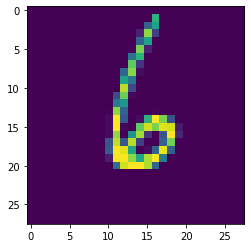

torch.float32


In [ ]:
# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

def train_DCGAN(EPOCH,saturation = False,ground_truth = 1):
  wandb.init(project="gan", entity="matancoo",settings=dict(start_method='thread'))
  for epoch in range(EPOCH):
    
    for i, data in enumerate(trainloader, 0):

      Dnet.zero_grad()
      # Format batch
      images = data[0]
      im_size = images.size(0)
      output = Dnet(images).view(-1) 

      ## Train with all-real batch
                                        # Ground_TRuth : 0.9 for example
      label = torch.ones((im_size))
      if not ground_truth:
        label.fill_(ground_truth)

      Dloss_real = criterion(output, label)
      Dloss_real.backward()
      D_x = output.mean().item() #loss for printing

      ## Train with all-fake batch
      noise = torch.randn(im_size,1, 1,LATEN_DIM)
      with torch.no_grad():  ###changed here to nograd. 
        fake = Gnet(noise)
      label.fill_(fake_label)
      output = Dnet(fake).squeeze() ##removed detached() on fake ---- why would need that?
      Dloss_fake = criterion(output, label)
      Dloss_fake.backward()

      D_G_z1 = output.mean().item()
      # Compute error of D as sum over the fake and the real batches
      Dloss = (Dloss_real + Dloss_fake)/2 #If I add loss_real and loss_fake here I get a backward error ===== why?
      # Update D
      optimizerD.step()


      # Update G network:
      ###########################
      noise1 = torch.randn(im_size,1, 1,LATEN_DIM)
      fake1 = Gnet(noise1)


      Gnet.zero_grad()   
      zeros = torch.zeros((im_size))
      ones = torch.ones((im_size))       
      # Calculate loss G given output #saturation/non_saturation version

      output = Dnet(fake1).view(-1)
      if saturation:
        Gloss = -criterion(output,zeros)
      else: 
        Gloss = criterion(output,ones) # fake labels are real for generator
      
      # Calculate gradients for G
      Gloss.backward()
      optimizerG.step()

      D_G_z2 = output.mean().item()


      # Stats
      log_dict = {"Gloss": Gloss,"Dloss_real": Dloss_real,"Dloss_fake":Dloss_fake,"Dloss": Dloss}

      # # log 10 images from this batch for inspection
      # if (epoch % 3 == 0):
      #   with torch.no_grad():
      #     fake = Gnet(fixed_noise).detach()
      #   log_dict[f"{epoch}/train_examples"] = [wandb.Image(i) for i in fake[:10]]
    
      wandb.log(log_dict)
      # wandb.watch(Dnet)  #log gradients and topology
      # wandb.watch(Gnet)



      if i % batch_size == 0:
          print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                % (epoch, EPOCH, i, len(trainloader),
                  Dloss.item(), Gloss.item(), D_x, D_G_z1, D_G_z2))

      # Save Losses for plotting later
      G_losses.append(Gloss.item())
      D_losses.append(Dloss.item())
  # schedulerD.step()


 
train_DCGAN(EPOCH,saturation = False,ground_truth = 1)

wandb: Currently logged in as: matancoo. Use `wandb login --relogin` to force relogin


[0/25][0/469]	Loss_D: 0.6881	Loss_G: -0.7008	D(x): 0.5317	D(G(z)): 0.5240 / 0.5030
[0/25][128/469]	Loss_D: 0.6484	Loss_G: -0.5611	D(x): 0.5173	D(G(z)): 0.4700 / 0.4285
[0/25][256/469]	Loss_D: 0.5055	Loss_G: -0.3381	D(x): 0.5497	D(G(z)): 0.3298 / 0.2852
[0/25][384/469]	Loss_D: 0.5362	Loss_G: -0.4245	D(x): 0.5218	D(G(z)): 0.3343 / 0.3418
[1/25][0/469]	Loss_D: 0.5989	Loss_G: -0.4351	D(x): 0.6307	D(G(z)): 0.5155 / 0.3498
[1/25][128/469]	Loss_D: 0.6914	Loss_G: -0.4551	D(x): 0.4558	D(G(z)): 0.4322 / 0.3561
[1/25][256/469]	Loss_D: 0.5820	Loss_G: -0.4310	D(x): 0.6081	D(G(z)): 0.4718 / 0.3465
[1/25][384/469]	Loss_D: 0.6216	Loss_G: -0.4486	D(x): 0.6834	D(G(z)): 0.5688 / 0.3588
[2/25][0/469]	Loss_D: 0.6033	Loss_G: -0.6202	D(x): 0.5083	D(G(z)): 0.3910 / 0.4566
[2/25][128/469]	Loss_D: 0.6127	Loss_G: -0.5279	D(x): 0.4941	D(G(z)): 0.3902 / 0.4044
[2/25][256/469]	Loss_D: 0.6424	Loss_G: -0.4372	D(x): 0.6332	D(G(z)): 0.5541 / 0.3519
[2/25][384/469]	Loss_D: 0.6190	Loss_G: -0.5339	D(x): 0.5075	D(G(z)): 0.

torch.Size([128, 1, 28, 28])


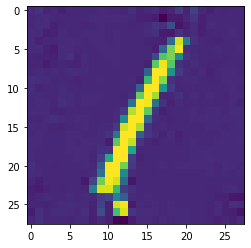

In [ ]:
import torchvision as tv

def generate_samples(latent_vec=None, num=None):
        num = batch_size if num is None else num

        fixed_noise = torch.randn(batch_size, 1, 1,LATEN_DIM)
        latent_vec = fixed_noise if latent_vec is None else latent_vec
        with torch.no_grad():
            samples = Gnet(latent_vec)
        return samples


images = generate_samples()
print(images.shape)
plt.imshow(images[0].squeeze())
plt.show()

    

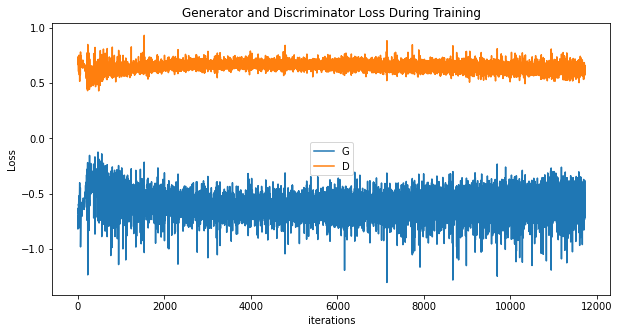

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[ 3.8205e-03,  1.1240e-02, -8.2782e-03, -1.1793e-02, -1.2643e-02,
           7.8365e-03, -4.7226e-03,  1.6108e-03,  3.8570e-03,  1.2916e-02,
           3.3065e-03,  1.1544e-02,  2.3765e-02, -1.0626e-02, -6.8152e-04,
          -5.5963e-03,  5.1233e-03,  5.3880e-02, -2.0088e-02,  5.0591e-02,
          -2.6244e-02, -1.0548e-02, -1.8159e-03, -4.8717e-03, -5.0047e-04,
           8.3969e-03,  9.0911e-03,  4.9468e-03],
         [-5.7098e-03,  2.7663e-03, -3.2859e-03,  1.3050e-02,  7.2300e-03,
          -7.2067e-03, -3.8642e-03, -6.2138e-03,  7.9848e-03,  9.1748e-03,
           1.9292e-03,  5.1281e-03,  6.7964e-04, -1.5101e-02, -1.1059e-02,
           9.4587e-03,  2.1695e-02,  3.1288e-02, -9.2159e-04,  1.3352e-02,
          -7.7237e-03, -4.0547e-03, -3.7962e-03, -6.3692e-03,  1.2407e-03,
           7.7316e-03,  8.0208e-03,  8.9155e-03],
         [-1.0012e-02,  2.6978e-03, -4.2592e-03, -2.6620e-03, -2.7984e-03,
          -3.1655e-03, -4.2592e-03,  4.3675e-03,  3.6311e-03,  1.8065e-03,


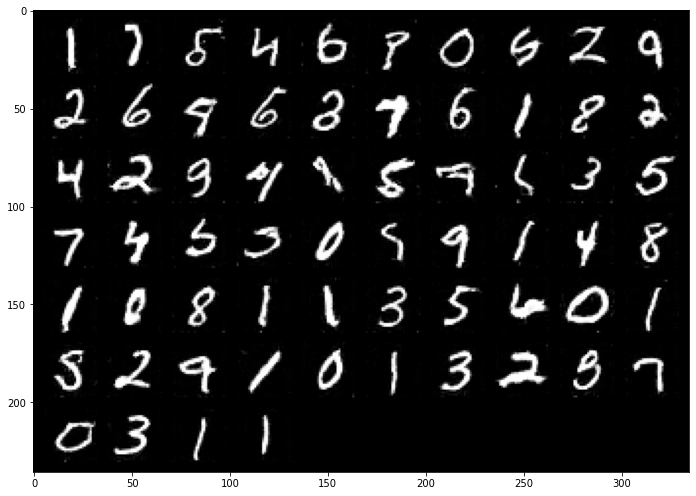

In [ ]:
def show_image(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

Gnet.eval()

with torch.no_grad():
    # reconstruct images from the random latent vectors
    img_recon = Gnet(fixed_noise)
    print(img_recon[0])
    fig, ax = plt.subplots(figsize=(20, 8.5))
    show_image(torchvision.utils.make_grid(img_recon[:64],10,5))
    plt.show()

GAN-INVERSION


In [ ]:
class Encoder(nn.Module):
    def __init__(self, laten_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride = 2, padding = 1),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            nn.Conv2d(32, 64, 3, stride = 2, padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.Conv2d(64, 64, 3, stride = 2),
            nn.ReLU(True),
            nn.Flatten(1),
            nn.Linear(64 * 3 * 3, 64),
            nn.ReLU(True),
            nn.Linear(64, laten_dim))

    def forward(self, x):
        # print(x.shape)
        x = self.encoder(x)
        # print(x.shape)
        return x.unsqueeze(1).unsqueeze(1)


###
EPOCH = 10
encoder = Encoder(LATEN_DIM)
criterion = nn.MSELoss()
optimizer = optim.Adam(encoder.parameters(),lr=0.001, betas=(0.5, 0.999)) 
###



train_loss =[]
test_loss =[]

for epoch in range(EPOCH):
    train_running_loss = 0.0
    test_running_loss = 0.0

    #Training
    encoder.train()
    Gnet.eval()

    for i, data in enumerate(trainloader, 0):
        images, labels = data
        output = Gnet(encoder(images))
        loss = criterion(images, output)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_running_loss += loss.item()
    #calculate loss for epoch
    train_loss.append(train_running_loss / len(trainloader))
    #Testing
    encoder.eval()
    with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = Gnet(encoder(images))
          loss = criterion(images, outputs)

          test_running_loss += loss.item()

    test_loss.append(test_running_loss / len(testloader))
    #reinitialize the losses
    train_running_loss = 0.0
    test_running_loss = 0.0 


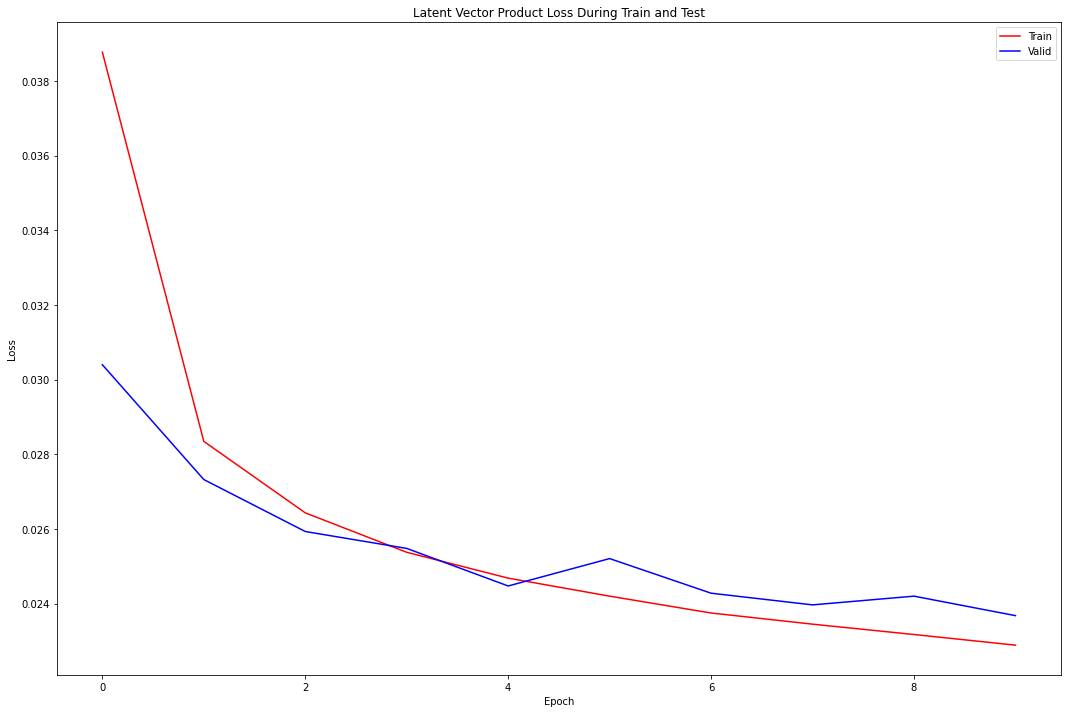

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


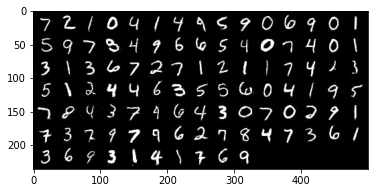

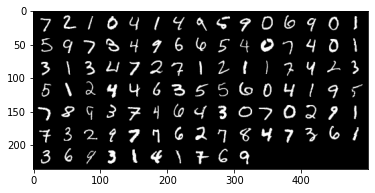

In [ ]:

## NOT MY CODE ----> I used plotly and wanbd. I added here for easier grading 

# def graph_loss_plot(train_loss_arr, test_loss_arr):
#     plt.figure(figsize=(18,12))
#     plt.title("Latent Vector Product Loss During Train and Test")
#     plt.plot(train_loss_arr, 'r', label='Train')
#     plt.plot(test_loss_arr,'b', label='Valid')
#     plt.ylabel('Loss')
#     plt.xlabel('Epoch')
#     plt.legend()
#     plt.show()


# graph_loss_plot(train_loss, test_loss)
# # output_plot(encoder, Gnet,testset)
# Gnet.eval()
# for data in testloader:
#   img, _ = data
#   break
# with torch.no_grad():
#     img_recon =  Gnet(encoder(img))
#     # fig, ax = plt.subplots(figsize=(20, 8.5))
#     show_image(torchvision.utils.make_grid(img_recon[:100],15,5))
#     plt.show()

#     show_image(torchvision.utils.make_grid(img[:100],15,5))
    
#     plt.show()






Non-Adversarial Generative Networks -- Wasserstein Auto-Encoders (AEs)

In order to shape the latent space’s distribution to be a “simple” and sample-able distribution, let us explore the use of additional losses over the encoder. In particular, let us require that the empirical mean, standard-deviation and kurtosis of latent vectors are identical to those of a standard Gaussian distribution






In [ ]:
a = torch.Tensor([[1,2,3],[1,2,3],[1,2,3]])
torch.mean(a,dim=1)


tensor([2., 2., 2.])

In [ ]:
#Losses
def kurtosis_loss(v):
  #note v takes the form (batch_size,-1)
  # higher kurtosis corresponds to greater extremity of deviations (or outliers) (not the configuration of data near the mean)
  mean = torch.mean(v, dim =1, keepdim=True)
  std = torch.std(v)
  score = (v-mean)/std
  return torch.mean(torch.pow(score,4)-3) #calculating the forth moment of the distribution. 


# If the kurtosis value is positive then it suggests heavy tails. 
# A negative value means that there are light tails. 
# The tail heaviness or lightness is in comparison with the normal distribution.
# it suggests whether the data distribution is flatter or less flat than the normal distribution. 
# The kurtosis value is 3.0 for a standard normal distribution.


def calculate_mmd_loss(x, z):
  #note z,x take the form (batch_size,-1)

  #We will calculate the MMD loss based on the Mean, STD and kurtosis.
  # Mean
  loss_mean = torch.mean(abs(torch.mean(x,dim=1, keepdim=True)-torch.mean(z,dim=1))) #removed torch abs
  # STD
  loss_cov = torch.mean(abs(torch.cov(x)- torch.cov(z)))
  # Kurtosis
  loss_kurtosis = torch.mean(abs(kurtosis_loss(x) - kurtosis_loss(z)))

  return torch.mean(torch.Tensor([loss_mean, loss_cov, loss_kurtosis]) # totensor is requied for torch.mean

In [ ]:
#Decoder symmetric to GAN_inversion Encoder

class Encoder(nn.Module):
    def __init__(self, laten_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride = 2, padding = 1),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            nn.Conv2d(32, 64, 3, stride = 2, padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.Conv2d(64, 64, 3, stride = 2),
            nn.ReLU(True),
            nn.Flatten(1),
            nn.Linear(64 * 3 * 3, 64),
            nn.ReLU(True),
            nn.Linear(64, laten_dim))

    def forward(self, x):
        x = self.encoder(x)
        return x.unsqueeze(1).unsqueeze(1)

class Decoder(nn.Module):
    def __init__(self, laten_dim):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(laten_dim, 64),
            nn.ReLU(True),
            nn.Linear(64, 64 * 3 * 3),
            nn.ReLU(True))
        self.unflat = nn.Unflatten(dim=3, unflattened_size=(64, 3, 3))

        self.convT = nn.Sequential(
            nn.ConvTranspose2d(64, 64, 3,stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, 3,stride=2, padding =1, output_padding =1),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 1, 3,stride=2, padding =1, output_padding =1),
        )

    def forward(self, x):
      x = self.linear(x)
      x = self.unflat(x).squeeze()
      x = self.convT(x)  
      return x


In [ ]:


def train_WAE():

  wandb.init(project="WAE", entity="matancoo",settings=dict(start_method='thread'))

  encoder.train()
  decoder.train()
  for epoch in range(EPOCH):
    for i, data in enumerate(trainloader, 0):
      images, true_labels = data
      encoder.zero_grad() #The mmd_loss explodes if not
      decoder.zero_grad()
      
      #Forward pass
      encoded_images = encoder(images)
      print(encoded_images.shape)
      print(encoded_images.squeeze().shape)
      noise = torch.randn(images.shape[0], LATEN_DIM) #maybe need gaussian distribu here instead
      mmd_loss = calculate_mmd_loss(encoded_images.squeeze(),noise)

      decoded_images = decoder(encoded_images)
      #Calculating loss
      reconstruct_loss = criterion(images,decoded_images)
      loss = (reconstruct_loss + mmd_loss)/2 
      log_dict = {"loss": loss,"reconstruction_loss": reconstruct_loss,"mmd_loss":mmd_loss} #moved this to here see if change graph on wanb
      wandb.log(log_dict)
      #Backward pass
      # optimizer.zero_grad() --- dont think this is necessary 
      loss.backward()
      optimizerE.step()
      optimizerD.step()

      # Stats


      if i % batch_size == 0:
          print('[%d/%d][%d/%d]\loss: %.4f\reconstruction_loss: %.4f\mmd_loss: %.4f'
                % (epoch, EPOCH, i, len(trainloader),
                  loss.item(), reconstruct_loss.item(), mmd_loss.item()))


#TODO:save netwrok




In [ ]:
def evaluate_and_show_WAE():

  def show_image(img):
      npimg = img.numpy()
      plt.imshow(np.transpose(npimg, (1, 2, 0)))

  encoder.eval()
  decoder.eval()
  losses = 0
  with torch.no_grad():
      images = iter(testloader).next()[0]
      encoded_images = encoder(images)
      reconstructed_images = decoder(encoded_images)
      fig, ax = plt.subplots(figsize=(20, 8.5))
      show_image(vutils.make_grid(reconstructed_images[:100],10,5))
      plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


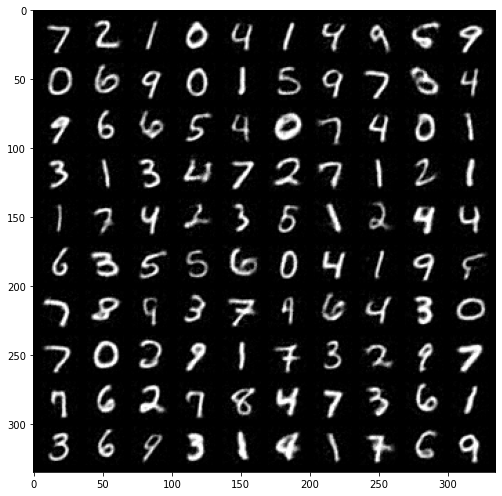

In [ ]:
evaluate_and_show_WAE()

In [ ]:
EPOCH = 50
batch_size = 128
LATEN_DIM = 100
criterion = nn.MSELoss()
encoder = Encoder(LATEN_DIM)
decoder = Decoder(LATEN_DIM) 
optimizerE = optim.Adam(encoder.parameters(), lr = 0.0002)
optimizerD = optim.Adam(decoder.parameters(), lr = 0.0002)


encoder, decoder = train_WAE() #TODO: need to learn how to save network


loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▄▄▅▅▆▆▇█
mmd_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▄▄▅▅▆▆▇█
reconstruction_loss,█▅▄▅▄▄▃▂▂▂▂▂▂▂▁▁▁▂▂▁▁▁▁▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,363.2724
mmd_loss,726.44574
reconstruction_loss,0.09908


econstruction_loss: 1.4485\mmd_loss: 0.1870
econstruction_loss: 0.0770\mmd_loss: 0.0706
econstruction_loss: 0.0645\mmd_loss: 0.0678
econstruction_loss: 0.0538\mmd_loss: 0.0473
econstruction_loss: 0.0456\mmd_loss: 0.0634
econstruction_loss: 0.0387\mmd_loss: 0.0839
econstruction_loss: 0.0351\mmd_loss: 0.0779
econstruction_loss: 0.0322\mmd_loss: 0.0776
econstruction_loss: 0.0302\mmd_loss: 0.0581
econstruction_loss: 0.0299\mmd_loss: 0.0798
econstruction_loss: 0.0279\mmd_loss: 0.0649
econstruction_loss: 0.0281\mmd_loss: 0.0678
econstruction_loss: 0.0255\mmd_loss: 0.0774
econstruction_loss: 0.0259\mmd_loss: 0.0599
econstruction_loss: 0.0234\mmd_loss: 0.0610
econstruction_loss: 0.0232\mmd_loss: 0.0959
econstruction_loss: 0.0241\mmd_loss: 0.0614
econstruction_loss: 0.0219\mmd_loss: 0.0912
econstruction_loss: 0.0231\mmd_loss: 0.1101
econstruction_loss: 0.0228\mmd_loss: 0.0739
econstruction_loss: 0.0219\mmd_loss: 0.0682
econstruction_loss: 0.0210\mmd_loss: 0.0740
econstruction_loss: 0.0205\mmd_l

KeyboardInterrupt: ignored

In [ ]:
#interpolation check of our AE

#sample two images from data
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from skimage import io 
import plotly.express as px

def interpolate(encoder,decoder,im1,im2,alpha):
  laten_vec1 = encoder(im1)
  laten_vec2 = encoder(im2)
  interpolation = decoder((laten_vec1 * alpha) + (laten_vec2 * (1-alpha)))
  return interpolation


encoder.eval()
decoder.eval()

for batch in testloader:
  data, labels = batch
  break


im1, im2  = data[13], data[21]        
im1, im2 = torch.unsqueeze(im1,0), torch.unsqueeze(im2,0)    
#chose 10 alph values linearly spaced

new_images = []
for alpha in np.linspace(0,1,10):  
  new_image = interpolate(encoder,decoder,im1,im2,alpha).detach().squeeze().numpy()
  new_images.append(new_image)

# reconstruct images from the chosen laten vectors



im1 = im1.detach().numpy().squeeze()
im2 = im2.detach().numpy().squeeze()
initial_ims = np.array([im1,im2])

new_images = np.array(new_images)
fig1 = px.imshow(new_images, facet_col=0)
fig2 = px.imshow(initial_ims,facet_col=0)
fig1.show()
fig2.show()


NameError: ignored